In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [2]:
ANSWERS_PATH = 'Questionnaire.csv'
df = pd.read_csv(ANSWERS_PATH, encoding='cp1252')

In [3]:
df.head()

,Id,Start time,Completion time,Email,Name,What is your participant code?\n,What is your occupation,Do you have any prior experience with Machine Learning?,What is machine learning?,What is the difference between machine learning and traditional programming?,...,Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed learning about AI.1,Please select the option that applies to how you feel about each of the below statements.\n.I understand how AI works better than before taking part in this study.1,Please select the option that applies to how you feel about each of the below statements.\n.I am interested in learning more about AI.1,Please select the option that applies to how you feel about each of the below statements.\n.The game was boring.,Please select the option that applies to how you feel about each of the below statements.\n.The game presented the topic in an interesting way.,Please select the option that applies to how you feel about each of the below statements.\n.I feel like I understand how the specific kind of AI presented in this study fits into the wider context of A1,Please select the option that applies to how you feel about each of the below statements.\n.I think about AI as magic.2,Please select the option that applies to how you feel about each of the below statements.\n.I am intimidated by the difficulty of learning about AI.,Please select the option that applies to how you feel about each of the below statements.\n.I am interested in learning more about AI.2,Please select the option that applies to how you feel about each of the below statements.\n.I find the prospect of learning about AI too boring.
0,3,4/19/24 18:02:38,4/19/24 18:09:43,anonymous,NaN,60,Student,No,The field of study that gives computers the ab...,"In machine learning, the program tries to lear...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,4/19/24 18:08:22,4/19/24 18:17:00,anonymous,NaN,Code 27,Quantity Surveyor,No,The field of study that gives computers the ab...,"In machine learning, the program tries to lear...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,4/19/24 18:59:04,4/19/24 19:01:24,anonymous,NaN,51,Advocacy and Wellbeing Support Worker,No,The field of study that gives computers the ab...,"In machine learning, the program tries to lear...",...,Agree,Agree,Agree,Strongly disagree,Agree,Agree,NaN,NaN,NaN,NaN
3,7,4/19/24 19:17:06,4/19/24 19:23:00,anonymous,NaN,92,Flimmaker (freelance),no,A branch of computer science that focuses on c...,"In machine learning, the program tries to lear...",...,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Disagree,Agree,Strongly agree,NaN,NaN,NaN,NaN
4,8,4/19/24 20:30:03,4/19/24 20:33:35,anonymous,NaN,40,None,No,The field of study that gives computers the ab...,"In machine learning, the program tries to lear...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ML Knowledge

In [247]:
questions = ['What is machine learning?',
                 'What is the difference between machine learning and traditional programming?',
                 'How do machine learning models learn?',
                 'In the context of a robot vacuum cleaner in a house, identify the agent, and the environment:',
                 'Choose the sentence that best describes how models using Q-tables learn:',
                 'What are Q-values?',
                 'What is the role of Q-values in the model’s learning process?',
                 'What is exploration?',
                 'Who gives the rewards?',
                 'What are generations?',
                 'What is required for a model to be operational and for public use?']

right_answers = ['The field of study that gives computers the ability to learn without being explicitly programmed',
                 'In machine learning, the program tries to learn the solution of a task, whereas in traditional programming, the program only follows specific instructions.',
                 'Every generation, most machine learning models are fed training data, produce an output and learn from the feedback they receive.',
                 'Agent: Robot – Environment: House ',
                 'The agent learns to navigate the environment by taking actions in a given situation and receiving rewards. The agent’s goal is to take actions that will produce the best possible rewards. ',
                 'It’s the model’s representation of how desirable each action is for a given situation. ',
                 'When the model performs an action, it receives a positive, negative, or null reward. The model changes the Q-value associated with the action, depending on the reward.',
                 'It represents the process of trying out random actions to learn about the environment.',
                 'The environment gives rewards. The developer sets up the amount through rules.',
                 'In Machine Learning, generations refer to individual attempts of the model to do its task during training.',
                 'The model must be successfully trained.'
                ]

raw_answers_df = df[questions].copy()

raw_answers_df.head()

,What is machine learning?,What is the difference between machine learning and traditional programming?,How do machine learning models learn?,"In the context of a robot vacuum cleaner in a house, identify the agent, and the environment:",Choose the sentence that best describes how models using Q-tables learn:,What are Q-values?,What is the role of Q-values in the model’s learning process?,What is exploration?,Who gives the rewards?,What are generations?,What is required for a model to be operational and for public use?
0,The field of study that gives computers the ab...,"In machine learning, the program tries to lear...","Every generation, most machine learning models...",Agent: Robot – Environment: Room,The agent learns to navigate the environment b...,It’s the model’s representation of how desirab...,"When the model performs an action, it receives...",It represents the process of trying out random...,The environment gives rewards. The developer s...,"In Machine Learning, generations are versions ...",The model must be successfully trained.
1,The field of study that gives computers the ab...,"In machine learning, the program tries to lear...","Every generation, most machine learning models...",Agent: Robot – Environment: House,The agent learns to navigate the environment b...,It’s the model’s representation of how desirab...,"When the model performs an action, it receives...",It represents the process of trying out random...,The environment gives rewards. The developer s...,"In Machine Learning, generations are versions ...",The model must be in it's exploration phase.
2,The field of study that gives computers the ab...,"In machine learning, the program tries to lear...","Every generation, most machine learning models...",Agent: Robot – Environment: House,The agent learns to navigate the environment b...,It’s the model’s representation of how desirab...,"When the model performs an action, it receives...",It represents the process of trying out random...,The environment gives rewards. The developer s...,"In Machine Learning, generations refer to indi...",The model must be successfully trained.
3,A branch of computer science that focuses on c...,"In machine learning, the program tries to lear...","Every generation, most machine learning models...",Agent: Robot – Environment: House,The agent learns to navigate the environment b...,It’s the model’s representation of how desirab...,"When the model performs an action, it receives...",It represents the process of trying out random...,The model gives rewards to the agent for succe...,"In Machine Learning, generations refer to indi...",The model must be successfully trained.
4,The field of study that gives computers the ab...,"In machine learning, the program tries to lear...","Every generation, most machine learning models...",Agent: Robot – Environment: Room,The agent learns to navigate the environment b...,It’s the model’s representation of how desirab...,"When the model performs an action, it receives...",It represents the process of trying out random...,The environment gives rewards. The developer s...,"In Machine Learning, generations are versions ...",The model must be successfully trained.


In [5]:
answers_df = raw_answers_df[raw_answers_df[raw_answers_df.columns] == right_answers].copy()
answers_df = answers_df.notna()
answers_df['Score'] = answers_df.sum(axis=1)
answers_df['Id'] = df['What is your participant code?\n']
answers_df['Group'] = df['Which study group were you assigned to?']
answers_df.head()

,What is machine learning?,What is the difference between machine learning and traditional programming?,How do machine learning models learn?,"In the context of a robot vacuum cleaner in a house, identify the agent, and the environment:",Choose the sentence that best describes how models using Q-tables learn:,What are Q-values?,What is the role of Q-values in the model’s learning process?,What is exploration?,Who gives the rewards?,What are generations?,What is required for a model to be operational and for public use?,Score,Id,Group
0,True,True,True,False,True,True,True,False,True,False,True,8,60,A
1,True,True,True,True,True,True,True,False,True,False,False,8,Code 27,A
2,True,True,True,True,True,True,True,False,True,True,True,10,51,B
3,False,True,True,True,True,True,True,False,False,True,True,8,92,B
4,True,True,True,False,True,True,False,False,True,False,True,7,40,A


In [6]:
group_a = answers_df[answers_df['Group'] == 'A']['Score']
group_b = answers_df[answers_df['Group'] == 'B']['Score']
group_c = answers_df[answers_df['Group'] == 'C']['Score']

print(f'Size of group A: {len(group_a)}')
print(f'Size of group B: {len(group_b)}')
print(f'Size of group C: {len(group_c)}')

Size of group A: 8
Size of group B: 8
Size of group C: 9


## Video vs Game

In [7]:
t_stat_a_b, p_value_a_b = ttest_ind(group_a, group_b)

print("t-test:", t_stat_a_b)
print("p-value:", p_value_a_b)

t-test: -0.1550966886102647
p-value: 0.8789589963910317


## Game vs Control

In [88]:
t_stat_b_c, p_value_b_c = ttest_ind(group_b, group_c)

print("t-test:", t_stat_b_c)
print("p-value:", p_value_b_c)

t-test: 1.105668205405148
p-value: 0.28628909598999774


# Linear regression

In [9]:
import statsmodels.api as sm

X = sm.add_constant(answers_df['Group'].map({'A': -1, 'B': 1, 'C': 0}))
reg = sm.OLS(answers_df['Score'], X)
fitted_reg = reg.fit()
fitted_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                   0.02327
Date:                Wed, 01 May 2024   Prob (F-statistic):              0.880
Time:                        18:32:29   Log-Likelihood:                -46.782
No. Observations:                  25   AIC:                             97.56
Df Residuals:                      23   BIC:                             100.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9200      0.328     21.112      0.000       6.242       7.598
Group          0.0625      0.410      0.153      0.880      -0.785       0.910
==============================================================================
Omnibus:                        0.020   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.990   Jarque-Bera (JB):                0.213
Skew:                           0.034   Prob(JB):                        0.899
Kurtosis:                       2.553   Cond. No.                         1.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
answers_df['Score']

0      8
1      8
2     10
3      8
4      7
5      6
6      7
7      7
8      8
9      5
10     9
11     4
12     7
13     5
14     7
15     8
16     6
17     7
18     5
19     6
20     6
21    10
22     7
23     4
24     8
Name: Score, dtype: int64

## Let's visualize the scores

<AxesSubplot:xlabel='Score', ylabel='Group'>

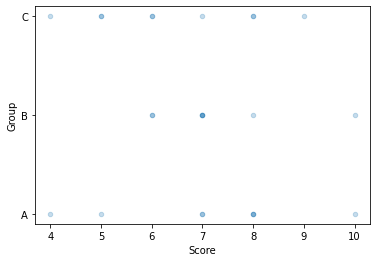

In [95]:
answers_df.plot.scatter(x='Score', y='Group', alpha=.25)

## Linear regression with control group as reference

In [89]:
import statsmodels.formula.api as smf

reg_cate = smf.ols("Score ~ C(Group, Treatment('C'))", data=answers_df)
fitted_reg_cate = reg_cate.fit()
fitted_reg_cate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.6087
Date:                Wed, 01 May 2024   Prob (F-statistic):              0.553
Time:                        19:32:58   Log-Likelihood:                -46.121
No. Observations:                  25   AIC:                             98.24
Df Residuals:                      22   BIC:                             101.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         6.4444      0.544     11.846      0.000       5.316       7.573
C(Group, Treatment('C'))[T.A]     0.6806      0.793      0.858      0.400      -0.964       2.325
C(Group, Treatment('C'))[T.B]     0.8056      0.793      1.016      0.321      -0.839       2.450
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   2.358
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.254
Skew:                           0.072   Prob(JB):                        0.881
Kurtosis:                       2.528   Cond. No.                         3.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear regression with game group as reference

In [180]:
reg_cate = smf.ols("Score ~ C(Group, Treatment('B'))", data=answers_df)
fitted_reg_cate = reg_cate.fit()
fitted_reg_cate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.6087
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.553
Time:                        02:26:21   Log-Likelihood:                -46.121
No. Observations:                  25   AIC:                             98.24
Df Residuals:                      22   BIC:                             101.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.2500      0.577     12.565      0.000       6.053       8.447
C(Group, Treatment('B'))[T.A]    -0.1250      0.816     -0.153      0.880      -1.817       1.567
C(Group, Treatment('B'))[T.C]    -0.8056      0.793     -1.016      0.321      -2.450       0.839
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   2.358
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.254
Skew:                           0.072   Prob(JB):                        0.881
Kurtosis:                       2.528   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## AI knowledge analysis

In [12]:
raw_answers_df.head()

,What is machine learning?,What is the difference between machine learning and traditional programming?,How do machine learning models learn?,"In the context of a robot vacuum cleaner in a house, identify the agent, and the environment:",Choose the sentence that best describes how models using Q-tables learn:,What are Q-values?,What is the role of Q-values in the model’s learning process?,What is exploration?,Who gives the rewards?,What are generations?,What is required for a model to be operational and for public use?
0,The field of study that gives computers the ab...,"In machine learning, the program tries to lear...","Every generation, most machine learning models...",Agent: Robot – Environment: Room,The agent learns to navigate the environment b...,It’s the model’s representation of how desirab...,"When the model performs an action, it receives...",It represents the process of trying out random...,The environment gives rewards. The developer s...,"In Machine Learning, generations are versions ...",The model must be successfully trained.
1,The field of study that gives computers the ab...,"In machine learning, the program tries to lear...","Every generation, most machine learning models...",Agent: Robot – Environment: House,The agent learns to navigate the environment b...,It’s the model’s representation of how desirab...,"When the model performs an action, it receives...",It represents the process of trying out random...,The environment gives rewards. The developer s...,"In Machine Learning, generations are versions ...",The model must be in it's exploration phase.
2,The field of study that gives computers the ab...,"In machine learning, the program tries to lear...","Every generation, most machine learning models...",Agent: Robot – Environment: House,The agent learns to navigate the environment b...,It’s the model’s representation of how desirab...,"When the model performs an action, it receives...",It represents the process of trying out random...,The environment gives rewards. The developer s...,"In Machine Learning, generations refer to indi...",The model must be successfully trained.
3,A branch of computer science that focuses on c...,"In machine learning, the program tries to lear...","Every generation, most machine learning models...",Agent: Robot – Environment: House,The agent learns to navigate the environment b...,It’s the model’s representation of how desirab...,"When the model performs an action, it receives...",It represents the process of trying out random...,The model gives rewards to the agent for succe...,"In Machine Learning, generations refer to indi...",The model must be successfully trained.
4,The field of study that gives computers the ab...,"In machine learning, the program tries to lear...","Every generation, most machine learning models...",Agent: Robot – Environment: Room,The agent learns to navigate the environment b...,It’s the model’s representation of how desirab...,"When the model performs an action, it receives...",It represents the process of trying out random...,The environment gives rewards. The developer s...,"In Machine Learning, generations are versions ...",The model must be successfully trained.


## Preprocessing by using Label encoding

This helps us identify the answer that was selected instead of having the raw text of the answers.

In [13]:
from sklearn.preprocessing import LabelEncoder
encoders = {}

encoded_answers_df = raw_answers_df.copy()
for column in encoded_answers_df.columns:
    encoder = LabelEncoder()
    encoded_answers_df.loc[:, column] = encoder.fit_transform(encoded_answers_df[column])
    encoders[column] = encoder
encoded_answers_df.head()

,What is machine learning?,What is the difference between machine learning and traditional programming?,How do machine learning models learn?,"In the context of a robot vacuum cleaner in a house, identify the agent, and the environment:",Choose the sentence that best describes how models using Q-tables learn:,What are Q-values?,What is the role of Q-values in the model’s learning process?,What is exploration?,Who gives the rewards?,What are generations?,What is required for a model to be operational and for public use?
0,1,0,0,3,1,2,2,1,1,0,3
1,1,0,0,2,1,2,2,1,1,0,1
2,1,0,0,2,1,2,2,1,1,1,3
3,0,0,0,2,1,2,2,1,2,1,3
4,1,0,0,3,1,2,3,1,1,0,3


## Modes analysis

In [84]:
modes = df.groupby('Which study group were you assigned to?')[questions].apply(lambda x: x.mode().iloc[0])
modes.head()

,What is machine learning?,What is the difference between machine learning and traditional programming?,How do machine learning models learn?,"In the context of a robot vacuum cleaner in a house, identify the agent, and the environment:",Choose the sentence that best describes how models using Q-tables learn:,What are Q-values?,What is the role of Q-values in the model’s learning process?,What is exploration?,Who gives the rewards?,What are generations?,What is required for a model to be operational and for public use?
Which study group were you assigned to?,,,,,,,,,,,
A,The field of study that gives computers the ab...,"In machine learning, the program tries to lear...","Every generation, most machine learning models...",Agent: Robot – Environment: Room,The agent learns to navigate the environment b...,It’s the model’s representation of how desirab...,"When the model performs an action, it receives...",It represents the process of trying out random...,The environment gives rewards. The developer s...,"In Machine Learning, generations are versions ...",The model must be successfully trained.
B,A branch of computer science that focuses on c...,"In machine learning, the program tries to lear...","Every generation, most machine learning models...",Agent: Robot – Environment: House,The agent learns to navigate the environment b...,It’s the model’s representation of how desirab...,"When the model performs an action, it receives...",It represents the process of trying out random...,The environment gives rewards. The developer s...,"In Machine Learning, generations refer to indi...",The model must be successfully trained.
C,A branch of computer science that focuses on c...,"In machine learning, the program tries to lear...","Every generation, most machine learning models...",Agent: Robot – Environment: House,The agent learns to navigate the environment b...,It’s the model’s representation of how desirab...,"When the model performs an action, it receives...",It represents the process of trying out random...,The environment gives rewards. The developer s...,"In Machine Learning, generations refer to indi...",The model must be successfully trained.


In [87]:
modes[modes == right_answers].notna()

,What is machine learning?,What is the difference between machine learning and traditional programming?,How do machine learning models learn?,"In the context of a robot vacuum cleaner in a house, identify the agent, and the environment:",Choose the sentence that best describes how models using Q-tables learn:,What are Q-values?,What is the role of Q-values in the model’s learning process?,What is exploration?,Who gives the rewards?,What are generations?,What is required for a model to be operational and for public use?
Which study group were you assigned to?,,,,,,,,,,,
A,True,True,True,False,True,True,True,False,True,False,True
B,False,True,True,True,True,True,False,False,True,True,True
C,False,True,True,True,True,True,True,False,True,True,True


## Clustering individuals by their answers
Scales the answers for future PCA

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = encoded_answers_df.values
X_scaled = scaler.fit_transform(X)

In [18]:
from kmodes.kmodes import KModes

cost = {}
centroids = {}
clusters_df = pd.DataFrame()
clusters_df['Group'] = df['Which study group were you assigned to?']

for i in range(2,8):
    kmodes = KModes(n_clusters=i, init='Huang', n_init=5, verbose=1)
    clusters = kmodes.fit_predict(X)
    clusters_df[f'KModes{i}'] = clusters
    cost[f'KModes{i}'] = kmodes.cost_
    centroids[f'KModes{i}'] = kmodes.cluster_centroids_

encoded_answers_df.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 72.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8, cost: 71.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 71.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 8, cost: 71.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 9, cost: 71.0
Run 5, iteration: 2/100, moves: 0, cost: 71.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5, cost: 63.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 68.0
Init: initializing centroids
Init: initializing cl

,What is machine learning?,What is the difference between machine learning and traditional programming?,How do machine learning models learn?,"In the context of a robot vacuum cleaner in a house, identify the agent, and the environment:",Choose the sentence that best describes how models using Q-tables learn:,What are Q-values?,What is the role of Q-values in the model’s learning process?,What is exploration?,Who gives the rewards?,What are generations?,What is required for a model to be operational and for public use?
0,1,0,0,3,1,2,2,1,1,0,3
1,1,0,0,2,1,2,2,1,1,0,1
2,1,0,0,2,1,2,2,1,1,1,3
3,0,0,0,2,1,2,2,1,2,1,3
4,1,0,0,3,1,2,3,1,1,0,3


In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print(f'The first 2 columns retained {pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]:.2f}% of the variance')
print(f'The first 3 columns retained {pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2]:.2f}% of the variance')


The first 2 columns retained 0.38% of the variance
The first 3 columns retained 0.53% of the variance


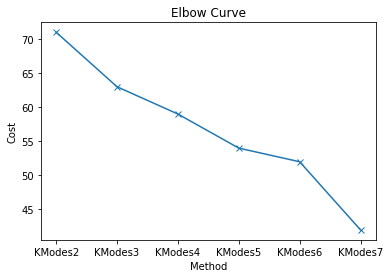

In [20]:
plt.plot(cost.keys(), cost.values(), 'x-') 
plt.xlabel('Method') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

Using the elbow method, it seems 4 clusters is the best choice.

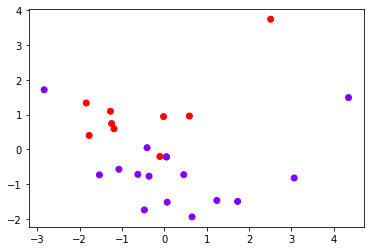

In [21]:
colormap2 = 'rainbow'
point_size = 100

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_df['KModes2'], cmap=colormap2)

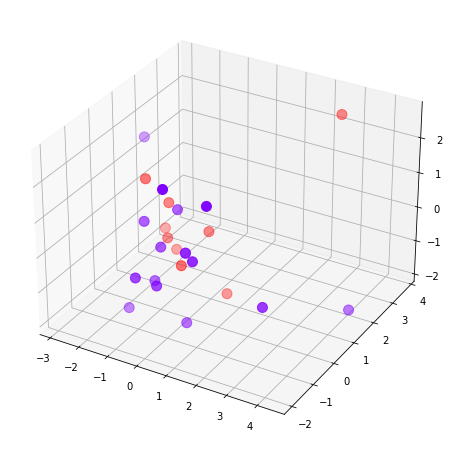

In [22]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1],X_pca[:, 2], c=clusters_df['KModes2'], cmap=colormap2, s=point_size)

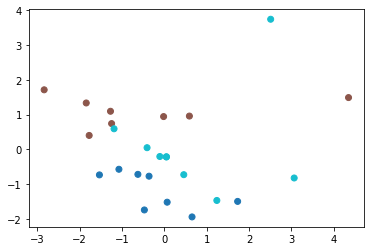

In [23]:
colormap3 = 'tab10'
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_df['KModes3'], cmap=colormap3)

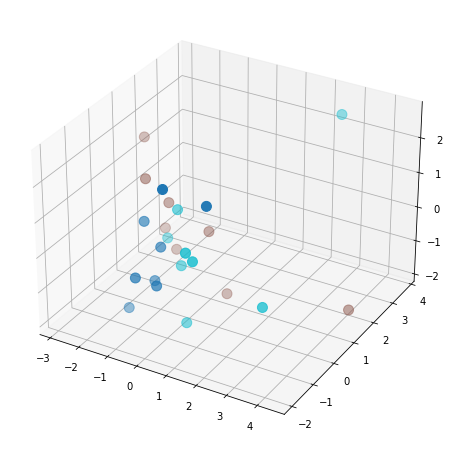

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1],X_pca[:, 2], c=clusters_df['KModes3'], cmap=colormap3, s=point_size)

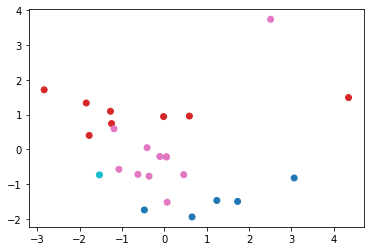

In [25]:
colormap3 = 'tab10'
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_df['KModes4'], cmap=colormap3)

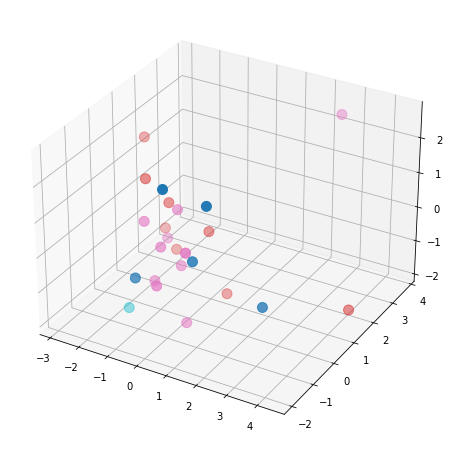

In [26]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1],X_pca[:, 2], c=clusters_df['KModes4'], cmap=colormap3, s=point_size)

## Analysis of the clusters

In [27]:
encoded_answers_df.head()

,What is machine learning?,What is the difference between machine learning and traditional programming?,How do machine learning models learn?,"In the context of a robot vacuum cleaner in a house, identify the agent, and the environment:",Choose the sentence that best describes how models using Q-tables learn:,What are Q-values?,What is the role of Q-values in the model’s learning process?,What is exploration?,Who gives the rewards?,What are generations?,What is required for a model to be operational and for public use?
0,1,0,0,3,1,2,2,1,1,0,3
1,1,0,0,2,1,2,2,1,1,0,1
2,1,0,0,2,1,2,2,1,1,1,3
3,0,0,0,2,1,2,2,1,2,1,3
4,1,0,0,3,1,2,3,1,1,0,3


In [28]:
clusters_df

,Group,KModes2,KModes3,KModes4,KModes5,KModes6,KModes7
0,A,0,0,2,2,3,0
1,A,0,2,2,1,1,4
2,B,0,2,2,1,0,4
3,B,1,1,1,0,0,3
4,A,0,0,0,2,3,5
5,B,1,1,1,0,5,3
6,B,1,1,1,0,0,1
7,B,1,2,2,1,0,1
8,C,0,2,2,1,0,4
9,C,0,1,1,0,5,3


In [49]:
clusters_df[clusters_df['Group'] == 'A'][clusters_df[f'KModes{n_clusters}'] == i]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Group,KModes2,KModes3,KModes4,KModes5,KModes6,KModes7
0,A,0,0,2,2,3,0
4,A,0,0,0,2,3,5
12,A,0,0,2,4,4,0
13,A,0,0,3,4,3,1
15,A,0,0,2,4,4,0


In [53]:
def get_centroid(full_centroids_data: dict, clusters_df, answer_encoders, n_clusters: int):
    cluster_centroids_df = pd.DataFrame(full_centroids_data[f'KModes{n_clusters}'], columns=encoded_answers_df.columns)
    
    new_index = [f'Cluster {i}' for i in range(len(cluster_centroids_df))]
    cluster_centroids_df = cluster_centroids_df.rename(index=dict(zip(cluster_centroids_df.index, new_index)))
    
    for col in cluster_centroids_df.columns:
        cluster_centroids_df[col] = answer_encoders[col].inverse_transform(cluster_centroids_df[col])
        
    # Show cluster size
    cluster_centroids_df['Group A'] = [len(clusters_df[clusters_df['Group'] == 'A'][clusters_df[f'KModes{n_clusters}'] == i]) for i in range(n_clusters)]
    cluster_centroids_df['Group B'] = [len(clusters_df[clusters_df['Group'] == 'B'][clusters_df[f'KModes{n_clusters}'] == i]) for i in range(n_clusters)]
    cluster_centroids_df['Group C'] = [len(clusters_df[clusters_df['Group'] == 'C'][clusters_df[f'KModes{n_clusters}'] == i]) for i in range(n_clusters)]
    cluster_centroids_df['Cluster Size'] = [len(clusters_df[clusters_df[f'KModes{n_clusters}'] == i]) for i in range(n_clusters)]

    # Transpose the DataFrame for easier comparison
    cluster_centroids_df = cluster_centroids_df.T
    
    return cluster_centroids_df

answers_centroids_df = get_centroid(centroids, clusters_df, encoders, 3)
answers_centroids_df.head(20)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


,Cluster 0,Cluster 1,Cluster 2
What is machine learning?,The field of study that gives computers the ab...,A branch of computer science that focuses on c...,The field of study that gives computers the ab...
What is the difference between machine learning and traditional programming?,"In machine learning, the program tries to lear...","In machine learning, the program tries to lear...","In machine learning, the program tries to lear..."
How do machine learning models learn?,"Every generation, most machine learning models...","Every generation, most machine learning models...","Every generation, most machine learning models..."
"In the context of a robot vacuum cleaner in a house, identify the agent, and the environment:",Agent: Robot – Environment: Room,Agent: Robot – Environment: House,Agent: Robot – Environment: House
Choose the sentence that best describes how models using Q-tables learn:,The agent learns to navigate the environment b...,The agent learns to navigate the environment b...,The agent learns to navigate the environment b...
What are Q-values?,It’s the model’s representation of how desirab...,It’s the model’s representation of how desirab...,It’s the model’s representation of how desirab...
What is the role of Q-values in the model’s learning process?,"When the model performs an action, it receives...","When the model performs an action, it receives...","When the model performs an action, it receives..."
What is exploration?,It represents the process of trying out random...,It represents the process of trying out random...,It represents the process of trying out random...
Who gives the rewards?,The environment gives rewards. The developer s...,The model gives rewards to the agent for succe...,The environment gives rewards. The developer s...
What are generations?,"In Machine Learning, generations refer to indi...","In Machine Learning, generations refer to indi...","In Machine Learning, generations refer to indi..."


### Comparison against the correct answers

In [54]:
answers_centroids_df_T = answers_centroids_df.T
temp = answers_centroids_df_T[questions]
answers_centroids_df_T[questions] = temp[temp != right_answers]
answers_centroids_df = answers_centroids_df_T.T
answers_centroids_df.head(20)

,Cluster 0,Cluster 1,Cluster 2
What is machine learning?,NaN,A branch of computer science that focuses on c...,NaN
What is the difference between machine learning and traditional programming?,NaN,NaN,NaN
How do machine learning models learn?,NaN,NaN,NaN
"In the context of a robot vacuum cleaner in a house, identify the agent, and the environment:",Agent: Robot – Environment: Room,NaN,NaN
Choose the sentence that best describes how models using Q-tables learn:,NaN,NaN,NaN
What are Q-values?,NaN,NaN,NaN
What is the role of Q-values in the model’s learning process?,NaN,NaN,NaN
What is exploration?,It represents the process of trying out random...,It represents the process of trying out random...,It represents the process of trying out random...
Who gives the rewards?,NaN,The model gives rewards to the agent for succe...,NaN
What are generations?,NaN,NaN,NaN


In [55]:
answers_centroids_df.T.head(10)

,What is machine learning?,What is the difference between machine learning and traditional programming?,How do machine learning models learn?,"In the context of a robot vacuum cleaner in a house, identify the agent, and the environment:",Choose the sentence that best describes how models using Q-tables learn:,What are Q-values?,What is the role of Q-values in the model’s learning process?,What is exploration?,Who gives the rewards?,What are generations?,What is required for a model to be operational and for public use?,Group A,Group B,Group C,Cluster Size
Cluster 0,NaN,NaN,NaN,Agent: Robot – Environment: Room,NaN,NaN,NaN,It represents the process of trying out random...,NaN,NaN,NaN,5,1,2,8
Cluster 1,A branch of computer science that focuses on c...,NaN,NaN,NaN,NaN,NaN,NaN,It represents the process of trying out random...,The model gives rewards to the agent for succe...,NaN,The model must be past its exploration phase.,0,3,5,8
Cluster 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,It represents the process of trying out random...,NaN,NaN,NaN,3,4,2,9


# Enjoyment

In [129]:
full_enjoyment = df[df.columns[19:]]
full_enjoyment.head()

,Which study group were you assigned to?,"Did you watch the entire lecture? If not, how much of the lecture did you watch?\n",Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed watching the video.,Please select the option that applies to how you feel about each of the below statements.\n.The learning material was easy to follow.,Please select the option that applies to how you feel about each of the below statements.\n.I think about AI as magic.,Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed learning about AI.,Please select the option that applies to how you feel about each of the below statements.\n.I understand how AI works better than before taking part in this study.,Please select the option that applies to how you feel about each of the below statements.\n.I am interested in learning more about AI.,Please select the option that applies to how you feel about each of the below statements.\n.The video was boring.,Please select the option that applies to how you feel about each of the below statements.\n.The video presented the topic in an interesting way.,...,Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed learning about AI.1,Please select the option that applies to how you feel about each of the below statements.\n.I understand how AI works better than before taking part in this study.1,Please select the option that applies to how you feel about each of the below statements.\n.I am interested in learning more about AI.1,Please select the option that applies to how you feel about each of the below statements.\n.The game was boring.,Please select the option that applies to how you feel about each of the below statements.\n.The game presented the topic in an interesting way.,Please select the option that applies to how you feel about each of the below statements.\n.I feel like I understand how the specific kind of AI presented in this study fits into the wider context of A1,Please select the option that applies to how you feel about each of the below statements.\n.I think about AI as magic.2,Please select the option that applies to how you feel about each of the below statements.\n.I am intimidated by the difficulty of learning about AI.,Please select the option that applies to how you feel about each of the below statements.\n.I am interested in learning more about AI.2,Please select the option that applies to how you feel about each of the below statements.\n.I find the prospect of learning about AI too boring.
0,A,"Yes, but started losing concentration around t...",Agree,Agree,Strongly disagree,Agree,Strongly agree,Agree,Disagree,Agree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,I watched all the lecture,Agree,Agree,Strongly disagree,Agree,Agree,Agree,Strongly agree,Neither agree nor disagree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Agree,Agree,Agree,Strongly disagree,Agree,Agree,NaN,NaN,NaN,NaN
3,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Disagree,Agree,Strongly agree,NaN,NaN,NaN,NaN
4,A,I watched the entire lecture,Neither agree nor disagree,Agree,Disagree,Agree,Strongly agree,Agree,Neither agree nor disagree,Neither agree nor disagree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
map_satisfaction = {
    'Strongly disagree': -1,
    'Disagree': -.5,
    'Neither agree nor disagree': 0,
    'Agree': .5,
    'Strongly agree': 1
}

full_enjoyment = full_enjoyment.replace(map_satisfaction)

full_enjoyment.head()

,Which study group were you assigned to?,"Did you watch the entire lecture? If not, how much of the lecture did you watch?\n",Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed watching the video.,Please select the option that applies to how you feel about each of the below statements.\n.The learning material was easy to follow.,Please select the option that applies to how you feel about each of the below statements.\n.I think about AI as magic.,Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed learning about AI.,Please select the option that applies to how you feel about each of the below statements.\n.I understand how AI works better than before taking part in this study.,Please select the option that applies to how you feel about each of the below statements.\n.I am interested in learning more about AI.,Please select the option that applies to how you feel about each of the below statements.\n.The video was boring.,Please select the option that applies to how you feel about each of the below statements.\n.The video presented the topic in an interesting way.,...,Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed learning about AI.1,Please select the option that applies to how you feel about each of the below statements.\n.I understand how AI works better than before taking part in this study.1,Please select the option that applies to how you feel about each of the below statements.\n.I am interested in learning more about AI.1,Please select the option that applies to how you feel about each of the below statements.\n.The game was boring.,Please select the option that applies to how you feel about each of the below statements.\n.The game presented the topic in an interesting way.,Please select the option that applies to how you feel about each of the below statements.\n.I feel like I understand how the specific kind of AI presented in this study fits into the wider context of A1,Please select the option that applies to how you feel about each of the below statements.\n.I think about AI as magic.2,Please select the option that applies to how you feel about each of the below statements.\n.I am intimidated by the difficulty of learning about AI.,Please select the option that applies to how you feel about each of the below statements.\n.I am interested in learning more about AI.2,Please select the option that applies to how you feel about each of the below statements.\n.I find the prospect of learning about AI too boring.
0,A,"Yes, but started losing concentration around t...",0.5,0.5,-1.0,0.5,1.0,0.5,-0.5,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,I watched all the lecture,0.5,0.5,-1.0,0.5,0.5,0.5,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5,0.5,0.5,-1.0,0.5,0.5,NaN,NaN,NaN,NaN
3,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,-0.5,0.5,1.0,NaN,NaN,NaN,NaN
4,A,I watched the entire lecture,0.0,0.5,-0.5,0.5,1.0,0.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
group_a_sat = full_enjoyment[full_enjoyment['Which study group were you assigned to?'] == 'A']
group_b_sat = full_enjoyment[full_enjoyment['Which study group were you assigned to?'] == 'B']
group_c_sat = full_enjoyment[full_enjoyment['Which study group were you assigned to?'] == 'C']

In [132]:
group_a_sat = group_a_sat.dropna(axis=1, how='all')
group_b_sat = group_b_sat.dropna(axis=1, how='all')
group_c_sat = group_c_sat.dropna(axis=1, how='all')

In [133]:
def satisfaction_t_test(col1, col2):
    return ttest_ind(col1, col2)

In [140]:
similar_questions = [
    {
        'A':'Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed watching the video.',
        'B':'Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed playing the game.',
        'C':''
    },
    {
        'A':'Please select the option that applies to how you feel about each of the below statements.\n.The learning material was easy to follow.',
        'B':'Please select the option that applies to how you feel about each of the below statements.\n.The learning material was easy to follow.1',
        'C':''
    },
    {
        'A':'Please select the option that applies to how you feel about each of the below statements.\n.I think about AI as magic.',
        'B':'Please select the option that applies to how you feel about each of the below statements.\n.I think about AI as magic.1',
        'C':'Please select the option that applies to how you feel about each of the below statements.\n.I think about AI as magic.2'
    },
    {
        'A':'Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed learning about AI.',
        'B':'Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed learning about AI.1',
        'C':''
    },
    {
        'A':'Please select the option that applies to how you feel about each of the below statements.\n.I understand how AI works better than before taking part in this study.',
        'B':'Please select the option that applies to how you feel about each of the below statements.\n.I understand how AI works better than before taking part in this study.1',
        'C':''
    },
    {
        'A':'Please select the option that applies to how you feel about each of the below statements.\n.I am interested in learning more about AI.',
        'B':'Please select the option that applies to how you feel about each of the below statements.\n.I am interested in learning more about AI.1',
        'C':'Please select the option that applies to how you feel about each of the below statements.\n.I am interested in learning more about AI.2',
    },
    {
        'A':'Please select the option that applies to how you feel about each of the below statements.\n.The video was boring. ',
        'B':'Please select the option that applies to how you feel about each of the below statements.\n.The game was boring.',
        'C':''
    },
    {
        'A':'Please select the option that applies to how you feel about each of the below statements.\n.The video presented the topic in an interesting way.',
        'B':'Please select the option that applies to how you feel about each of the below statements.\n.The game presented the topic in an interesting way.',
        'C':''
    },
    {
        'A':'Please select the option that applies to how you feel about each of the below statements.\n.I feel like I understand how the specific kind of AI presented in this study fits into the wider context of A',
        'B':'Please select the option that applies to how you feel about each of the below statements.\n.I feel like I understand how the specific kind of AI presented in this study fits into the wider context of A1',
        'C':''
    },
    {
        'A':'Please select the option that applies to how you feel about each of the below statements.\n.I understand how AI works better than before taking part in this study.',
        'B':'Please select the option that applies to how you feel about each of the below statements.\n.I understand how AI works better than before taking part in this study.1',
        'C':''
    },
]

indices_enjoyment = [0, 3, 6, 7]

## A vs B

In [135]:
for i in range(len(similar_questions)):
    t, p = satisfaction_t_test(group_a_sat[similar_questions[i]['A']], group_b_sat[similar_questions[i]['B']])
    print(f'index {i}:\tT test:{t}\tP value:{p}')

index 0:	T test:-1.1577674774819398	P value:0.26632979113201954
index 1:	T test:0.42365927286816174	P value:0.6782511276323852
index 2:	T test:1.5487418760404843	P value:0.143748039927464
index 3:	T test:0.3232299675777271	P value:0.7512984958350034
index 4:	T test:-0.9660917830792959	P value:0.3503914791072017
index 5:	T test:0.5705974021574557	P value:0.5773167210298011
index 6:	T test:1.2629080365809535	P value:0.22725171880875356
index 7:	T test:-2.083691952256555	P value:0.055995468104584625
index 8:	T test:0.0	P value:1.0
index 9:	T test:-0.9660917830792959	P value:0.3503914791072017


## B vs C

In [136]:
for i in range(len(similar_questions)):
    if similar_questions[i]['C'] != '':
        t, p = satisfaction_t_test(group_c_sat[similar_questions[i]['C']], group_b_sat[similar_questions[i]['B']])
        print(f'index {i}:\tT test:{t}\tP value:{p}')

index 2:	T test:0.6513126321486324	P value:0.5246982539479815
index 5:	T test:0.09637388493048525	P value:0.9244994657353746


In [158]:
enjoyment_questions

array([{'A': 'Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed watching the video.', 'B': 'Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed playing the game.', 'C': ''},
       {'A': 'Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed learning about AI.', 'B': 'Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed learning about AI.1', 'C': ''},
       {'A': 'Please select the option that applies to how you feel about each of the below statements.\n.The video was boring. ', 'B': 'Please select the option that applies to how you feel about each of the below statements.\n.The game was boring.', 'C': ''},
       {'A': 'Please select the option that applies to how you feel about each of the below statements.\n.The video presented the topic in an interesting way.', 'B': 'Please select the 

In [177]:
temp = group_a_sat[[extract_value(d, 'A') for d in enjoyment_questions]]
temp[temp.columns[3]] *= -1
temp

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed watching the video.,Please select the option that applies to how you feel about each of the below statements.\n.I enjoyed learning about AI.,Please select the option that applies to how you feel about each of the below statements.\n.The video was boring.,Please select the option that applies to how you feel about each of the below statements.\n.The video presented the topic in an interesting way.
0,0.5,0.5,-0.5,-0.5
1,0.5,0.5,1.0,-0.0
4,0.0,0.5,0.0,-0.0
11,0.0,0.0,0.0,-0.0
12,1.0,1.0,-1.0,-1.0
13,0.5,0.0,-0.5,0.5
15,1.0,0.5,-1.0,-1.0
21,0.5,0.5,-0.5,-0.5


In [163]:
enjoyment_questions = np.take(similar_questions, indices_enjoyment)

def extract_value(d, key):
    return d[key]


temp = group_a_sat[[extract_value(d, 'A') for d in enjoyment_questions]]
temp[temp.columns[3]] *= -1
[temp[i['A']].mean() for i in enjoyment_questions]

temp = group_b_sat[[extract_value(d, 'B') for d in enjoyment_questions]]
temp[temp.columns[3]] *= -1
[temp[i['B']].mean() for i in enjoyment_questions]

[0.6875, 0.375, -0.6875, 0.75]

In [178]:
temp = group_a_sat[[extract_value(d, 'A') for d in enjoyment_questions]]
temp[temp.columns[3]] *= -1
a = [temp[i['A']].mean() for i in enjoyment_questions]

temp = group_b_sat[[extract_value(d, 'B') for d in enjoyment_questions]]
temp[temp.columns[3]] *= -1
b = [temp[i['B']].mean() for i in enjoyment_questions]

t, p = ttest_ind(a, b)
t, p

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0.3990994689726728, 0.7036370278892821)

In [179]:
test_df = pd.DataFrame({'Group': ['A']*len(a)+['B']*len(b),
                        'Enjoyment': a+b})
test = smf.ols("Enjoyment ~ Group", data=test_df)
test = test.fit()
test.summary()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Enjoyment   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.136
Method:                 Least Squares   F-statistic:                    0.1593
Date:                Thu, 02 May 2024   Prob (F-statistic):              0.704
Time:                        05:00:49   Log-Likelihood:                -6.2338
No. Observations:                   8   AIC:                             16.47
Df Residuals:                       6   BIC:                             16.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0781      0.305      0.257      0.806      -0.667       0.823
Group[T.B]    -0.1719      0.431     -0.399      0.704      -1.226       0.882
==============================================================================
Omnibus:                        3.450   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                0.934
Skew:                           0.077   Prob(JB):                        0.627
Kurtosis:                       1.333   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# How many participants had the right answer per group

In [259]:
temp = df[questions]
temp = temp[temp == right_answers].notna()
temp['Group']= df['Which study group were you assigned to?']

out = pd.DataFrame(columns=questions, index=['A', 'B', 'C'])
for index in out.index:
    out.loc[index] = temp[temp['Group'] == index].mean(axis=0)
out.T

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,A,B,C
What is machine learning?,1.0,0.375,0.333333
What is the difference between machine learning and traditional programming?,0.875,0.875,1.0
How do machine learning models learn?,1.0,0.75,0.777778
"In the context of a robot vacuum cleaner in a house, identify the agent, and the environment:",0.375,0.875,0.444444
Choose the sentence that best describes how models using Q-tables learn:,0.75,0.875,0.888889
What are Q-values?,0.75,0.75,0.666667
What is the role of Q-values in the model’s learning process?,0.625,0.375,0.666667
What is exploration?,0.875,0.625,0.777778
Who gives the rewards?,0.75,0.625,0.444444
What are generations?,0.5,1.0,0.777778


In [258]:
df[df['Which study group were you assigned to?'] == 'A']['What is required for a model to be operational and for public use?']

0           The model must be successfully trained.
1      The model must be in it's exploration phase.
4           The model must be successfully trained.
11                 The model must make no mistakes.
12    The model must be past its exploration phase.
13    The model must be past its exploration phase.
15          The model must be successfully trained.
21          The model must be successfully trained.
Name: What is required for a model to be operational and for public use?, dtype: object